# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
# import required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest

sns.set()

In [4]:
# Helper functions

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data))) 

    return bs_replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def permutation_sample(data_1, data_2):
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
# Calculating mean and standard deviation of the temperature data

mean=df.temperature.mean()
std=df.temperature.std()
print('Mean temperature:',mean)
print('Standard Deviation of temperature:',std)

Mean temperature: 98.24923076923078
Standard Deviation of temperature: 0.7331831580389454


## Q1. Is the distribution of body temperatures normal?

The body temperature data is normally distributed.

To find the normality of given temperature distribution, 3 methods have been used:
1. Plot normal PDF with the histogram of the temperature data<p><p>
2. Plot ECDF of data with theroretical CDF
   <p>As comparing histogram to PDF suffers from binning bias, the ECDF of the data is compared with the theoretical CDF of the normal distribution<p>
3. Shapiro-Wilk Test:
    <p>Apart from the above graphical methods, in order to further confirm normality, a frequentist test is used. Shapiro-wilk test is used as it has been found to be the most powerful test in most situations<p>
        
All the above methods show that the data is normally distributed.

### 1. Plot of normal PDF with the histogram of the temperature data

Text(0,0.5,'PDF')

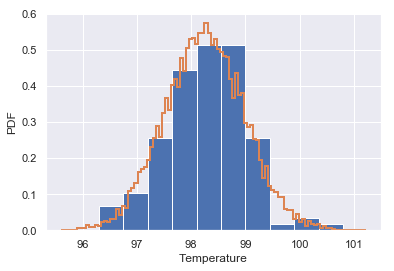

In [8]:
# Drawing a sample of size 10000 from temperature data
samples=np.random.normal(mean,std,10000)

# Bin size: As the sample size is 130, applying square root rule, bin size = 11.4. 
# Bin size of 10 is considered for the sake of convenience
_=plt.hist(df.temperature,bins=10, density=True)
_=plt.hist(samples,density=True,histtype='step',bins=100,linewidth=2)

plt.xlabel('Temperature')
plt.ylabel('PDF')

Distribution of Temperature looks normally distributed. But this plot might suffer from binning bias.

### 2. Plot ECDF of data with theroretical CDF


Text(0,0.5,'CDF')

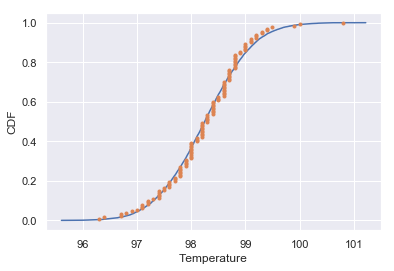

In [9]:
# Calculating x,y for temperature data
x,y = ecdf(df.temperature)

#Calculating theoretical x,y for data sample
x_theor, y_theor = ecdf(samples)

# Plotting CDF and ECDF
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')

plt.xlabel('Temperature')
plt.ylabel('CDF')

Distribution is normal

### 3. Shapiro-Wilk Test

In [10]:
print('p-value =',round(stats.shapiro(df.temperature)[1],2))

p-value = 0.23


Null hypothesis is that the distribution of temperature values is normal. As p-value is high, we <b>fail to reject the null hypothesis</b>.

## Q2. Is the sample size large? Are the observations independent?

**Large sample size**
<p> A sample size is considered large if it is greater than or equal to 30. As the size of the sample sample given here is 130, the sample is large.</p>
    
**Independent observations**
<p> For independence condition, sample size < 10% population size. The sample size is 130, which is 10% of 1300. The population is much larger than 1300, so we can say that the observations are <b>independent</b></p>.
    

## Q3. Is the true population mean really 98.6 degrees F?

### Bootstrap Hypothesis Test

<b>Null Hypothesis:</b> Mean normal body temperature of population is 98.6 degrees F
<p><b>Alternate Hypothesis:</b> Mean normal body temperature of population is different from 98.6 degrees F

In [11]:
# Mean normal body temperature
normal_temp = 98.6

# Shifting observed temperature values to match their mean to the normal body temperature
temperature_shifted = df.temperature - mean + normal_temp

# Test statistic: mean minus normal body temperature 
def diff_from_norm(data,standard_mean=normal_temp):
    return np.mean(data) - standard_mean

# Observed test statistic
diff_obs = diff_from_norm(df.temperature)

# Generate bootstrap replicates
bs_replicates = draw_bs_reps(temperature_shifted,diff_from_norm,10000)

# Calculating p-value: probability of the sample mean as low or lesser than the observed mean 
# considering null hypothesis is true 
p_value = np.sum(bs_replicates <= diff_obs)/10000
print('p-value is',p_value)

p-value is 0.0


As p-value is low, we can <b> reject the null hypothesis</b>. So, <p><b> True population mean is not 98.6 degrees F.

### Frequentist Statistical Testing

<b> One sample vs. Two sample Test:</b> We will use one sample test as one sample of data is being compared to a single number
<p><b> z vs. t statistic:</b> As the sample is sufficiently large (sample size = 130), z-statistic is appropriate.

<b>Null Hypothesis:</b> Mean normal body temperature of population is 98.6 degrees F
<p><b>Alternate Hypothesis:</b> Mean normal body temperature of population is different from 98.6 degrees F

### Using z statistic (approriate for this case)

In [12]:
# Applying one sample z-test to calculate p-value
p_value= ztest(df.temperature, x2=None,value= 98.6, alternative='two-sided')[1]
print('p-value is',p_value)

p-value is 4.9021570141012155e-08


As p-value is low, we can <b> reject the null hypothesis</b>. So, <p><b> True population mean is not 98.6 degrees F.

### Using t statistic

In [13]:
p_tval = stats.ttest_1samp(df.temperature, popmean=98.6)[1]
print('p-value i`s',p_tval)

p-value i`s 2.4106320415561276e-07


As p-value is low, we can <b> reject the null hypothesis</b>. So, <p><b> True population mean is not 98.6 degrees F.

### Comparison of z-test and t-test

The result from both the tests is same due to large sample size. 

## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

Theoretically, for small samples (<=30), t test is said to give more accurate results. As required to answer this question, we will use both z-test as well as t-test.

In [14]:
small_sample = np.random.choice(df.temperature,size=10)

# Applying one sample z-test to calculate p-value
small_p_zval= ztest(small_sample, x2=None,value= 98.6, alternative='two-sided')[1]
print('p-value for z-test is',small_p_zval)

# Applying t-test to calculate p-value
small_p_tval = stats.ttest_1samp(small_sample, popmean=98.6)[1]
print('p-value for t-test is',small_p_tval)

p-value for z-test is 0.5456505320984856
p-value for t-test is 0.5605730572829598


A single sample drawn from the data gave a high p-value for z-test as well as t-test. For the same sample, z-test is always giving a smaller p-value than t-test.

In order to better compare the p-values, we have taken multiple samples. 

In [15]:
size=100
small_p_zval = np.empty(size)
small_p_tval = np.empty(size)

for i in range(size):
    small_sample = np.random.choice(df.temperature,size=10)
    
    # Applying one sample z-test to calculate p-value
    small_p_zval[i]= ztest(small_sample, x2=None,value= 98.6, alternative='two-sided')[1]
    
    
    small_p_tval[i] = stats.ttest_1samp(small_sample, popmean=98.6)[1]
    
#print('p-value for z-test is',small_p_zval<.01)
#print('p-value for t-test is',small_p_tval<.01)
print("z-test: no. of small p-val out of",size,":",np.sum(small_p_zval<.05))
print("t-test: no. of small p-val out of",size,":",np.sum(small_p_tval<.05))

z-test: no. of small p-val out of 100 : 38
t-test: no. of small p-val out of 100 : 30


For both the cases, p-value is high most of the times, leading to failure in rejecting null hypothesis. In this case, we can say that the sample size of 10 is too small to reach to any conclusion.

## Q5. At what temperature should we consider someone's temperature to be "abnormal"?

### Bootstrap approach

In [16]:
bs_reps = draw_bs_reps(df.temperature,np.mean,10000)
np.percentile(bs_reps,[2.5,97.5])

array([98.12384615, 98.37307692])

So, temperature outside the range of (98.12, 98.37) should be considered abnormal.

### Frequentist approach

In [17]:
# Confidence interval = mean +/- MOE at 95% CI

# z at 95% confidence
z=stats.norm.ppf(.975)

# Standard error of mean: sem
sem= stats.sem(df.temperature)

# Margin of error = z*SEM
moe = z*sem

print(mean-moe,mean+moe)


98.12319642818166 98.3752651102799


As per frequentist approach, temperature outside the range of (98.12, 98.37) should be considered abnormal.

 ## Q6. Is there a significant difference between males and females in normal temperature?

I used two-sample permutation test. The difference of means of female and male temperature is 0.29. Using 2-sample permutation test we can check if this observed difference is by chance.

<b><p>Null Hypothesis:</b> There is no difference (less significant) in the mean female and mean male temperature.</p>
<b>Alternate Hypothesis:</b> There is significant difference in the mean female and mean male temperature.

In [18]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [19]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [20]:
f_temp = df[df.gender=='F'].temperature
m_temp = df[df.gender=='M'].temperature

In [21]:
print(f_temp.shape)
print(m_temp.shape)

(65,)
(65,)


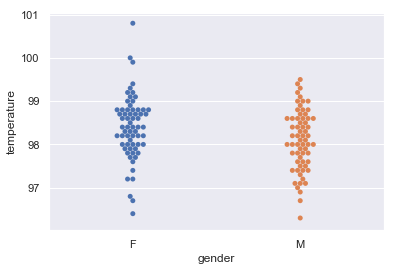

In [22]:
# Generate a bee swarm plot  
_ = sns.swarmplot(x=df.gender, y =df.temperature,data=df)

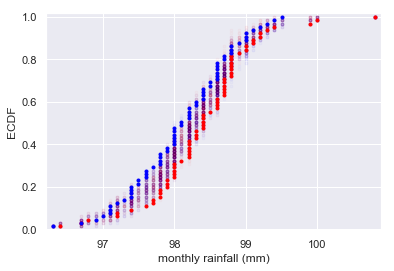

In [23]:
# Generate ECDF and CDF

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(f_temp,m_temp)
   
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
   
     # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(f_temp)
x_2, y_2 = ecdf(m_temp)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

The ECDF shows that female body temperatures are slightly higher than males.

In [24]:
# Two sample permutation test

emp_diff = np.mean(f_temp) - np.mean(m_temp)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)
    return diff

perm_reps = draw_perm_reps(f_temp,m_temp,diff_of_means,10000)
perm_p = np.sum(perm_reps>=emp_diff)/len(perm_reps)
perm_p

0.0136

In order to consider the significance in difference between male and female temperatures, let us compare p-value with different significance levels:

<b>alpha: .01</b>
p-value of 0.013 is slightly higher than significance level so we cannot reject the null hypothesis. 

<b>alpha: .05</b>
p-value is lesser than the significance level, so we reject the null hypothesis which means there is significant difference in male and female body temperatures.

<p><b> Conclusion on male and female body temperatures</b></p>
Considering the low p-value at the typical significance level of .05, we reject the null hypothesis and conclude that <i>There is significant difference in male and female body temperatures</i>. This is also corroborated by the above ECDF that shows that female body temperatures are slightly higher than male body temperatures.

## Final Conclusion
The observed body temperatures are normally distributed with true population mean different from the known standard of 98.6 degrees F.
Temperature outside the range of (98.12, 98.37) should be considered abnormal. There is no conclusive difference between male and female body temperatures